# Capstone Project  Week 3 - Part 2

## Assignment

Now that you have built a dataframe of the postal code of each neighborhood along with the borough name and neighborhood name, in order to utilize the Foursquare location data, we need to get the latitude and the longitude coordinates of each neighborhood.

Given that the geocoder package has been experienced as unreliable, data were comlpemented by the csv file here: http://cocl.us/Geospatial_data to create a dataframe as follows:

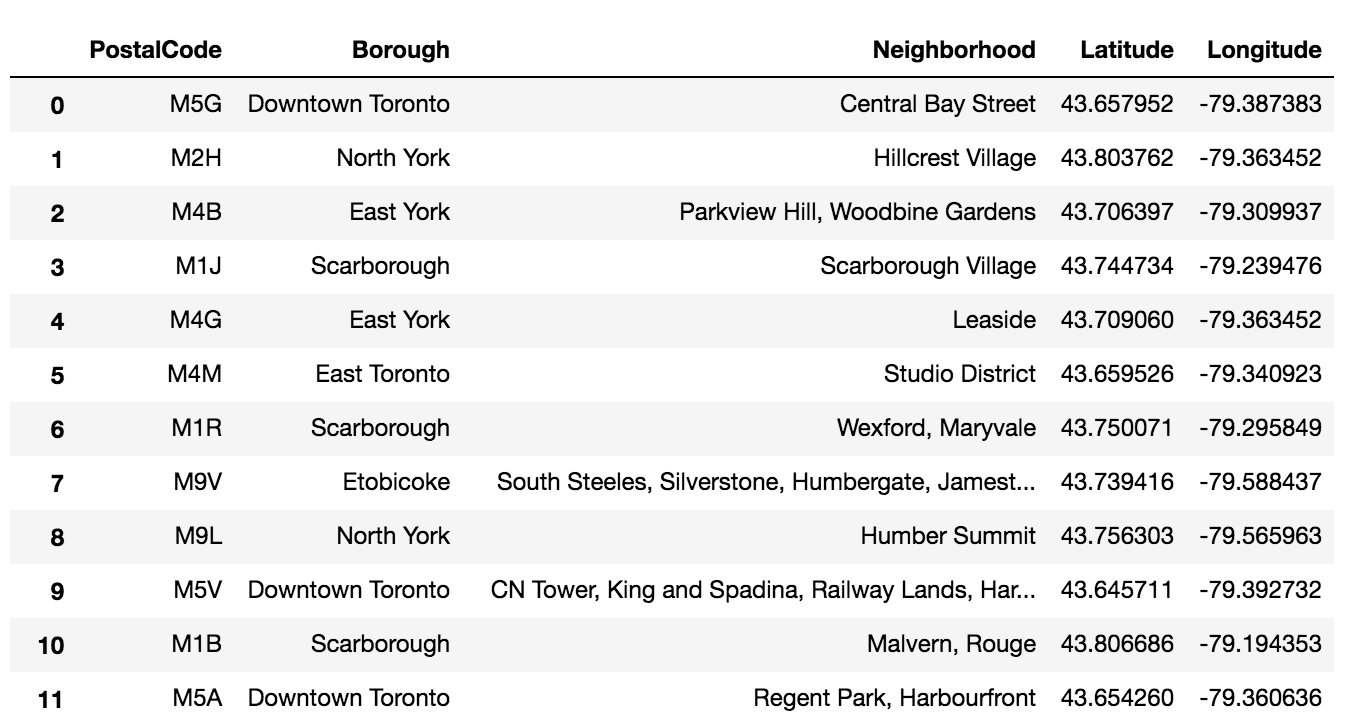

Once you are able to create the above dataframe, submit a link to the new Notebook on your Github repository. (2 marks)

## Explore Boroughs in Toronto

In [1]:
import numpy as np

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

print('Libraries imported.')

Libraries imported.


#### Load cleansed dataset from csv file

In [2]:
df_cleansed = pd.read_csv('capstone-data-package-part-1.csv')
df_cleansed.head(10)

,Postcode,Borough,Neighborhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park"
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge"
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff, Cliffside West"


#### Load geospatial data

_**Note:** Alternative approach instead of first download file is direct download (code commented out)_

In [3]:
#Alternative approach
#url = "http://cocl.us/Geospatial_data"
#df_geo = pd.read_csv(url)

!wget -q -O 'geospatial_data.csv' http://cocl.us/Geospatial_data
print('Data downloaded...')

df_geo = pd.read_csv('geospatial_data.csv')
df_geo.rename(columns={'Postal Code': 'Postcode'}, inplace=True)
df_geo.head()

Data downloaded...


,Postcode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


#### Merge geospatial data with Boroughs along the Postcode

In [4]:
df_extended = pd.merge(df_cleansed, df_geo, on='Postcode')
print('Data extended...')
print(df_extended.shape)
df_extended.head(8)

Data extended...
(103, 5)


,Postcode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park",43.727929,-79.262029
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge",43.711112,-79.284577


#### Save dataframe into CSV

In [5]:
df_extended.to_csv('capstone-data-package-part-2.csv', index = False)
print("Saved.")

Saved.
